# Dot Plot

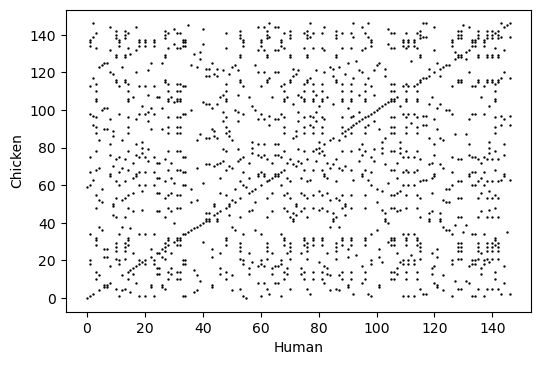


The following segments are the same in the two sequences:
Residues 1-3
Residue 5
Residues 7-9
Residue 13
Residues 15-21
Residue 23
Residue 25
Residues 27-29
Residues 31-33
Residues 35-43
Residues 45-47
Residues 49-50
Residue 52
Residue 54
Residues 57-59
Residue 61
Residues 63-69
Residue 72
Residue 74
Residues 79-81
Residue 83
Residues 85-86
Residues 89-108
Residue 111
Residues 114-116
Residues 118-119
Residue 121
Residues 123-125
Residues 128-130
Residues 132-133
Residue 135
Residues 138-139
Residues 141-143
Residues 145-147


In [1]:
import matplotlib.pyplot as plt

human = "MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH"
chicken = "MVHWTAEEKQLITGLWGKVNVAECGAEALARLLIVYPWTQRFFASFGNLSSPTAILGNPMVRAHGKKVLTSFGDAVKNLDNIKNTFSQLSELHCDKLHVDPENFRLLGDILIIVLAAHFSKDFTPECQAAWQKLVRVVAHALARKYH" 

plt.figure(dpi = 100)

matches = []

for i in range(len(human)):
    for j in range(len(chicken)):
        if human[i] == chicken[j]:
            plt.scatter(i,j,c="black",s=0.5)
            if i == j:
                matches.append(i+1)

plt.xlabel("Human")
plt.ylabel("Chicken")
plt.show()

print("\nThe following segments are the same in the two sequences:")
curr_segment = []
for match in matches:
    if len(curr_segment) == 0:
        curr_segment.append(match)
        if match == matches[-1]:
            print(f"Residue {curr_segment[0]}")
    else:
        if match - curr_segment[-1] == 1:
            curr_segment.append(match)
            if match == matches[-1]:
                print(f"Residues {curr_segment[0]}-{curr_segment[-1]}")
        else:
            if len(curr_segment) == 1:
                print(f"Residue {curr_segment[0]}")
                curr_segment = [match]
            else:
                print(f"Residues {curr_segment[0]}-{curr_segment[-1]}")
                curr_segment = [match]

In [2]:
human[0:20]

'MVHLTPEEKSAVTALWGKVN'

In [3]:
chicken[0:20]

'MVHWTAEEKQLITGLWGKVN'

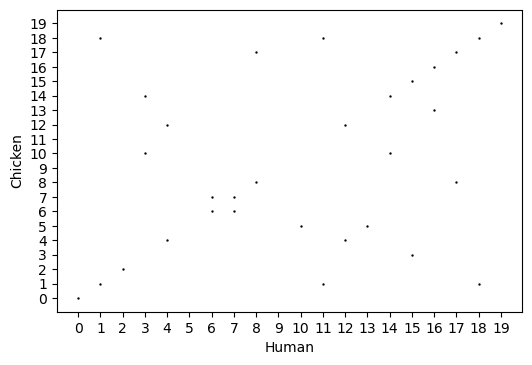


The following segments are the same in the two sequences:
Residues 1-3
Residue 5
Residues 7-9
Residue 13
Residues 15-20


In [4]:
import matplotlib.pyplot as plt

human = "MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH"
chicken = "MVHWTAEEKQLITGLWGKVNVAECGAEALARLLIVYPWTQRFFASFGNLSSPTAILGNPMVRAHGKKVLTSFGDAVKNLDNIKNTFSQLSELHCDKLHVDPENFRLLGDILIIVLAAHFSKDFTPECQAAWQKLVRVVAHALARKYH" 

plt.figure(dpi = 100)

matches = []

for i in range(20):
    for j in range(20):
        if human[i] == chicken[j]:
            plt.scatter(i,j,c="black",s=0.5)
            if i == j:
                matches.append(i+1)

plt.xlabel("Human")
plt.ylabel("Chicken")
plt.xticks(range(0,20))
plt.yticks(range(0,20))
plt.show()

print("\nThe following segments are the same in the two sequences:")
curr_segment = []
for match in matches:
    if len(curr_segment) == 0:
        curr_segment.append(match)
        if match == matches[-1]:
            print(f"Residue {curr_segment[0]}")
    else:
        if match - curr_segment[-1] == 1:
            curr_segment.append(match)
            if match == matches[-1]:
                print(f"Residues {curr_segment[0]}-{curr_segment[-1]}")
        else:
            if len(curr_segment) == 1:
                print(f"Residue {curr_segment[0]}")
                curr_segment = [match]
            else:
                print(f"Residues {curr_segment[0]}-{curr_segment[-1]}")
                curr_segment = [match]

# Scoring

In [5]:
seq1 = "AATCTATA"
seq2 = "AAG--ATA"

score = 0

match = 1
mismatch = 0
origination = 2
length = 1
gap = False

for i in range(len(seq1)):
    if seq1[i] == "-" or seq2[i] == "-":
        if gap == False:
            score = score - origination - length
            gap = True
        elif gap == True:
            score = score - length
    elif seq1[i] == seq2[i]:
        score = score + match
    elif seq1[i] != seq2[i]:
        score = score - mismatch

print(score)

1


# Global Alignment

In [6]:
def needleman_wunsch(seq1,seq2):
    
    table = [[0 for j in range(len(seq2)+1)] for i in range(len(seq1)+1)]
    align = [[(None,None) for j in range(len(seq2)+1)] for i in range(len(seq1)+1)]
    
    match_or_mismatch = {True: 2, False: -1}
    gap = -2
    
    for i in range(len(seq1)+1):
        for j in range(len(seq2)+1):
            if i == 0:
                table[i][j] = j*gap
                align[i][j] = (0,j-1)
            elif j == 0:
                table[i][j] = i*gap
                align[i][j] = (i-1,0)
            else:
                possibilities = [table[i-1][j] + gap,
                                 table[i][j-1] + gap,
                                 table[i-1][j-1] + match_or_mismatch[seq1[i-1]==seq2[j-1]]]
                table[i][j] = max(possibilities)
                previous = possibilities.index(max(possibilities))
                if previous == 0:
                    align[i][j] = (i-1,j)
                elif previous == 1:
                    align[i][j] = (i,j-1)
                elif previous == 2:
                    align[i][j] = (i-1,j-1)
                
    for row in table:
            for element in row:
                print(element,end="\t")
            print("\n")

    print(f"\nThe alignment score is {table[-1][-1]}.\n")
    
    i = len(seq1)
    j = len(seq2)
    align1 = seq1[i-1]
    align2 = seq2[j-1]
    while (i,j) != (0,0):
        if (i,j) == (0,0):
            align1 += seq1[0]
            align2 += seq2[0]
            break
        prev = align[i][j]
        if prev == (i-1,j-1):
            align1 += seq1[i-1] 
            align2 += seq2[j-1]
            i = i - 1
            j = j - 1
        elif prev == (i,j-1):
            align1 += "-"
            align2 += seq2[j-1]
            i = i
            j = j - 1
        elif prev == (i-1,j):
            align1 += seq1[i-1]
            align2 += "-"     
            i = i - 1
            j = j
    
    print("The alignment is: ")
    print(align1[-1:0:-1])
    print(align2[-1:0:-1])


needleman_wunsch("ACAGTCGAACG","ACCGTCCG")

0	-2	-4	-6	-8	-10	-12	-14	-16	

-2	2	0	-2	-4	-6	-8	-10	-12	

-4	0	4	2	0	-2	-4	-6	-8	

-6	-2	2	3	1	-1	-3	-5	-7	

-8	-4	0	1	5	3	1	-1	-3	

-10	-6	-2	-1	3	7	5	3	1	

-12	-8	-4	0	1	5	9	7	5	

-14	-10	-6	-2	2	3	7	8	9	

-16	-12	-8	-4	0	1	5	6	7	

-18	-14	-10	-6	-2	-1	3	4	5	

-20	-16	-12	-8	-4	-3	1	5	3	

-22	-18	-14	-10	-6	-5	-1	3	7	


The alignment score is 7.

The alignment is: 
ACAGTCGAACG
ACCGTC---CG


# Local Alignment

In [7]:
def smith_waterman(seq1,seq2):
    
    table = [[0 for j in range(len(seq2)+1)] for i in range(len(seq1)+1)]
    align = [[(None,None) for j in range(len(seq2)+1)] for i in range(len(seq1)+1)]
    
    match_or_mismatch = {True: 2, False: -1}
    gap = -2
    
    for i in range(len(seq1)+1):
        for j in range(len(seq2)+1):
            if i == 0:
                table[i][j] = 0
                align[i][j] = (0,j-1)
            elif j == 0:
                table[i][j] = 0
                align[i][j] = (i-1,0)
            else:
                possibilities = [table[i-1][j] + gap,
                                 table[i][j-1] + gap,
                                 table[i-1][j-1] + match_or_mismatch[seq1[i-1]==seq2[j-1]],
                                 0]
                table[i][j] = max(possibilities)
                previous = possibilities.index(max(possibilities))
                if previous == 0:
                    align[i][j] = (i-1,j)
                elif previous == 1:
                    align[i][j] = (i,j-1)
                elif previous == 2:
                    align[i][j] = (i-1,j-1)
                elif previous == 3:
                    align[i][j] = (i,j)
                
    for row in table:
            for element in row:
                print(element,end="\t")
            print("\n")

   
    max_row_values = max(table)
    max_row = table.index(max_row_values)
    max_column = max_row_values.index(max(max_row_values))
    
    print(f"\nThe alignment score is {table[max_row][max_column]}.\n")
    
    i = max_row
    j = max_column
    align1 = seq1[i-1]
    align2 = seq2[j-1]
    while (i,j) != (0,0):
        if (i,j) == (0,0):
            break
        prev = align[i][j]
        if prev == (i-1,j-1):
            align1 += seq1[i-1] 
            align2 += seq2[j-1]
            i = i - 1
            j = j - 1
        elif prev == (i,j-1):
            align1 += "-"
            align2 += seq2[j-1]
            i = i
            j = j - 1
        elif prev == (i-1,j):
            align1 += seq1[i]
            align2 += "-"     
            i = i - 1
            j = j
        elif prev == (i,j):
            break
    
    print("The alignment is: ")
    print(align1[-1:0:-1])
    print(align2[-1:0:-1])
    

smith_waterman("ACGTATCGCGTATA","GATGCGTATCG")

0	0	0	0	0	0	0	0	0	0	0	0	

0	0	2	0	0	0	0	0	2	0	0	0	

0	0	0	1	0	2	0	0	0	1	2	0	

0	2	0	0	3	1	4	2	0	0	0	4	

0	0	1	2	1	2	2	6	4	2	0	2	

0	0	2	0	1	0	1	4	8	6	4	2	

0	0	0	4	2	0	0	3	6	10	8	6	

0	0	0	2	3	4	2	1	4	8	12	10	

0	2	0	0	4	2	6	4	2	6	10	14	

0	0	1	0	2	6	4	5	3	4	8	12	

0	2	0	0	2	4	8	6	4	2	6	10	

0	0	1	2	0	2	6	10	8	6	4	8	

0	0	2	0	1	0	4	8	12	10	8	6	

0	0	0	4	2	0	2	6	10	14	12	10	

0	0	2	2	3	1	0	4	8	12	13	11	


The alignment score is 14.

The alignment is: 
CGTATCG
CGTATCG
